In [12]:
import gdown
url = 'https://drive.google.com/uc?id=1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-'
output = "/raid/syscon/malam/experiments/data/raw/data.zip"
gdown.download(url,output,quiet=False)

AttributeError: 'NoneType' object has no attribute 'groups'

In [13]:
!git clone https://github.com/chentinghao/download_google_drive.git
!cd download_google_drive/
!python download_gdrive.py "1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-" "/raid/syscon/malam/experiments/data/raw"

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), 4.77 KiB | 4.77 MiB/s, done.
python: can't open file 'download_gdrive.py': [Errno 2] No such file or directory


In [20]:
#!pip install wget
import wget
!wget -P "/raid/syscon/malam/experiments/data/raw/adult.zip" -O adult.csv "https://drive.google.com/uc?export=download&id=1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-"


--2024-02-10 01:55:35--  https://drive.google.com/uc?export=download&id=1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-
Resolving drive.google.com (drive.google.com)... 142.250.192.110, 2404:6800:4009:82a::200e
Connecting to drive.google.com (drive.google.com)|142.250.192.110|:443... connected.


HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-&export=download [following]
--2024-02-10 01:55:35--  https://drive.usercontent.google.com/download?id=1qmSEdZyzV1b6qe5TqramiZaCS3QgyL9-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.183.193, 2404:6800:4009:826::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.183.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 667679 (652K) [application/octet-stream]
Saving to: ‘adult.csv’

�L0V                100%[===================>] 652.03K  1.66MB/s    in 0.4s    

2024-02-10 01:55:37 (1.66 MB/s) - ‘adult.csv’ saved [667679/667679]



In [ ]:
kaggle datasets download -d wenruliu/adult-income-dataset

In [21]:
!unzip "/raid/syscon/malam/experiments/data/raw/adult.zip" -d "/raid/syscon/malam/experiments/data/raw" 

Archive:  /raid/syscon/malam/experiments/data/raw/adult.zip
  inflating: /raid/syscon/malam/experiments/data/raw/adult.csv  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/raid/syscon/malam/experiments/data/raw/adult.csv")

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Univariate Analysis

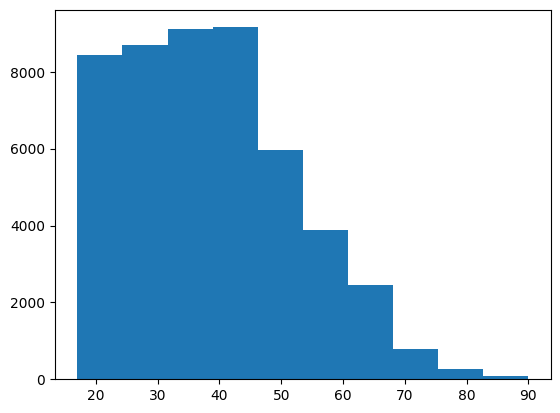

In [11]:
plt.hist(df['age'],bins = 10)
plt.show()

In [13]:
distinct_cat = df['workclass'].value_counts()
distinct_cat

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

One category in working class has no lable-it can be removed or replaced

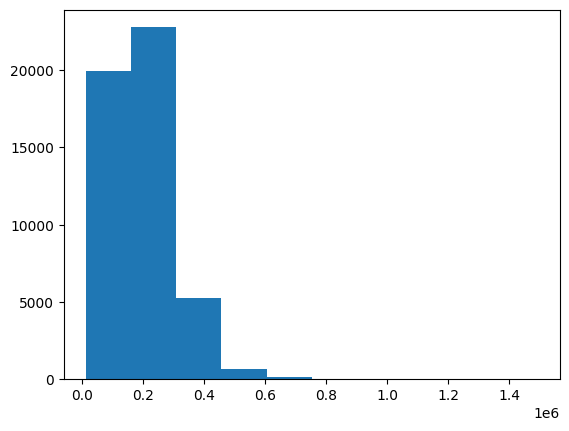

In [14]:
plt.hist(df["fnlwgt"])
plt.show()

In [15]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [16]:
df["educational-num"].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

education and education num coloumn are giving same information education coloumn should be deleted

In [17]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [18]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

There is one category where the labels are missing

In [21]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [24]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [25]:
df = df.drop_duplicates()

In [26]:
df.shape

(48790, 15)

In [28]:
df['workclass'] = df['workclass'].replace("?",np.nan)
df['occupation'] = df['occupation'].replace("?",np.nan)
df['native-country'] = df['native-country'].replace("?",np.nan)

In [30]:
df.dropna(how='any',inplace=True)

In [32]:
df.shape

(45222, 15)

In [34]:
df["workclass"].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

In [38]:
df.shape

(45222, 15)

In [39]:
df = df.drop(columns = ['capital-gain','capital-loss'])

In [40]:
df.shape

(45222, 13)

In [41]:
df.to_csv('/raid/syscon/malam/experiments/data/raw/cleaned_adult.csv',index=False)

In [3]:
new_df = pd.read_csv("/raid/syscon/malam/experiments/data/raw/cleaned_adult.csv")

In [4]:
new_df['gender'].value_counts()

gender
Male      30527
Female    14695
Name: count, dtype: int64